In [2]:
# import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.metrics import r2_score

from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from scipy.stats import linregress

In [4]:
df = pd.read_csv('datasets/banco.csv', encoding = "ISO-8859-1", low_memory = False).drop(['Unnamed: 0'], axis=1,errors='ignore')

In [98]:
df.head()

,Id,DN,Idade,Codsexo,RaÃ§a,pesoi,pesof,Alt,instruc,RendaSM,...,TFG_2_2014,TFG_2_2014_EQ,ESTAGIO_BANCO_2_2014,ESTAGIO_EQ_2_2014,ESTAGIOI,ESTAGIOF,ESTAGIOI_EQ,ESTAGIOF_EQ,CREATININAI,CREATININAF
0,27,29-May-40,74.0,2,1,74.9,70.0,167.0,Fundamental completo,1.14,...,NaN,NaN,NaN,NaN,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 2 - 60-89 ml,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 2 - 60-89 ml,1.40,1.10
1,40,21-Apr-37,78.0,1,1,83.4,80.3,155.0,NÃ£o sabe ler/escrever,NaN,...,31.18,31.32,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 4 - 15-29 ml,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 4 - 15-29 ml,EstÃ¡gio 3b - 30-44 ml,2.50,1.68
2,42,26-Jul-11,102.0,2,1,41.9,41.9,160.0,Alfabetizado,NaN,...,NaN,NaN,NaN,NaN,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 3a - 45-59 ml,1.32,1.50
3,44,15-Nov-31,83.0,2,1,44.5,45.0,147.0,Fundamental Incompleto,NaN,...,NaN,NaN,NaN,NaN,EstÃ¡gio 4 - 15-29 ml,EstÃ¡gio 4 - 15-29 ml,EstÃ¡gio 4 - 15-29 ml,EstÃ¡gio 4 - 15-29 ml,2.50,2.30
4,47,2-Aug-54,61.0,1,1,82.0,90.3,165.0,Fundamental Incompleto,1.00,...,32.34,32.48,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 3b - 30-44 ml,1.21,1.70


De acordo com os resultados do João, as variáveis que devo analisar são:\
$\textbf{Idade}$\
$\textbf{PAS_inicial}$\
$\textbf{PAS_final}$\
$\textbf{HemoglobinaI}$\
$\textbf{ColesterolTotalF}$\
$\textbf{GlicemiadeJejumI}$\
$\textbf{ColesterolHDLI}$\
$\textbf{ColesterolHDLF}$\
$\textbf{AcidoUricoI}$\
Essas variáveis obtiveram melhores resultados no teste de regressão simples, considerando a TFG_1_2011 como variável alvo.

In [99]:
#separando as colunas que eu quero analisar
reg_mul = pd.DataFrame(index=[i for i in range(df.shape[0])],columns=['Idade','PAS_inicial','PAS_final','HemoglobinaI','ColesterolTotalF',
             'GlicemiadeJejumI','ColesterolHDLI','ColesterolHDLF','AcidoUricoI','TFG_1_2011_EQ'])
reg_mul['Idade'] = df['Idade']
reg_mul['PAS_inicial'] = df['PAS_inicial']
reg_mul['PAS_final'] = df['PAS_final']
reg_mul['HemoglobinaI'] = df['HemoglobinaI']
reg_mul['ColesterolTotalF'] = df['ColesterolTotalF']
reg_mul['GlicemiadeJejumI'] = df['GlicemiadeJejumI']
reg_mul['ColesterolHDLI'] = df['ColesterolHDLI']
reg_mul['ColesterolHDLF'] = df['ColesterolHDLF']
reg_mul['AcidoUricoI'] = df['AcidoUricoI']

reg_mul['TFG_1_2011_EQ'] = df['TFG_1_2011_EQ']

In [100]:
reg_mul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 0 to 1282
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             1283 non-null   float64
 1   PAS_inicial       1283 non-null   float64
 2   PAS_final         1283 non-null   float64
 3   HemoglobinaI      1283 non-null   float64
 4   ColesterolTotalF  1283 non-null   float64
 5   GlicemiadeJejumI  1283 non-null   float64
 6   ColesterolHDLI    1283 non-null   float64
 7   ColesterolHDLF    1283 non-null   float64
 8   AcidoUricoI       1283 non-null   float64
 9   TFG_1_2011_EQ     1283 non-null   float64
dtypes: float64(10)
memory usage: 110.3 KB


### Normalizando os dados

In [102]:
scaler = preprocessing.MinMaxScaler( feature_range=(-1, 1) )
reg_mul_norm = scaler.fit_transform(reg_mul)
reg_mul_norm = pd.DataFrame(reg_mul_norm,columns=reg_mul.keys())
reg_mul_norm

,Idade,PAS_inicial,PAS_final,HemoglobinaI,ColesterolTotalF,GlicemiadeJejumI,ColesterolHDLI,ColesterolHDLF,AcidoUricoI,TFG_1_2011_EQ
0,0.317073,0.054393,0.196787,0.680715,-0.158654,-0.349591,-0.113445,-0.421687,-0.169231,-0.510397
1,0.414634,0.489540,0.036145,0.042146,-0.187500,-0.653583,-0.344538,-0.373494,-0.430769,-0.817392
2,1.000000,-0.121339,-0.598394,0.195402,-0.184376,-0.750459,-0.106288,-0.250117,-0.323077,-0.508995
3,0.536585,0.079498,-0.108434,0.604087,-0.293269,-0.750459,0.033613,0.108434,-0.169231,-0.756180
4,0.000000,0.129707,0.020080,0.693487,0.076923,-0.733756,0.432773,-0.204819,-0.323077,-0.553105
...,...,...,...,...,...,...,...,...,...,...
1278,-0.317073,0.330544,0.277108,0.514687,-0.184376,-0.542346,-0.260504,-0.250117,-0.153746,-0.292743
1279,0.121951,-0.087866,0.004016,0.450830,0.293269,-0.630199,-0.113445,-0.253012,-0.046154,-0.391991
1280,-0.048780,0.079498,-0.124498,0.501916,-0.076923,-0.680307,-0.323529,-0.421687,0.076923,-0.526658
1281,0.414634,0.062762,0.132530,0.629630,-0.134615,-0.636880,0.054622,-0.204819,-0.123077,-0.472174


#### Separando em x e y

In [103]:
X = reg_mul_norm.drop(columns='TFG_1_2011_EQ')
y = reg_mul_norm['TFG_1_2011_EQ']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30,random_state= 20200301)

### Regressão Múltipla

In [104]:
#primeiro irei considerar o sm do statsmodels
import statsmodels.api as sm
x_mul = sm.add_constant(X, prepend=True)
res =sm.OLS(y,x_mul).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TFG_1_2011_EQ   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     51.92
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           2.15e-80
Time:                        15:41:17   Log-Likelihood:                 103.85
No. Observations:                1283   AIC:                            -187.7
Df Residuals:                    1273   BIC:                            -136.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4918      0.021    -23.365      0.000      -0.533      -0.451
Idade               -0.2305      0.020    -11.784      0.000      -0.269      -0.192
PAS_inicial         -0.0094      0.031     -0.308      0.758      -0.070       0.051
PAS_final           -0.0693      0.035     -2.006      0.045      -0.137      -0.002
HemoglobinaI         0.1614      0.027      5.981      0.000       0.108       0.214
ColesterolTotalF     0.0021      0.032      0.064      0.949      -0.062       0.066
GlicemiadeJejumI     0.0901      0.027      3.367      0.001       0.038       0.143
ColesterolHDLI      -0.0246      0.029     -0.857      0.391      -0.081       0.032
ColesterolHDLF       0.0353      0.027      1.315      0.189      -0.017       0.088
AcidoUricoI         -0.2754      0.024    -11.516      0.000      -0.322      -0.228
==============================================================================
Omnibus:                      257.190   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.839
Skew:                           1.035   Prob(JB):                    2.40e-153
Kurtosis:                       5.977   Cond. No.                         7.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
ypred = res.predict(x_mul)

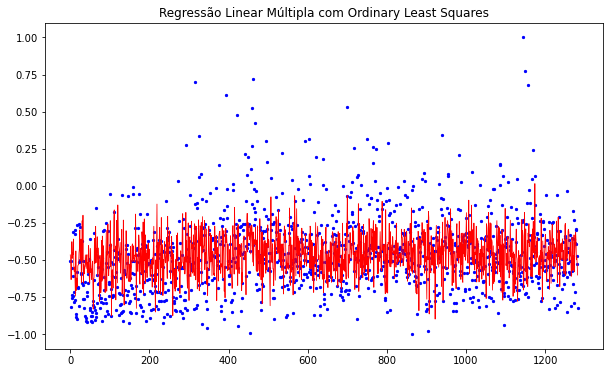

In [106]:
# print(ypred.shape,ytest.shape,xtest.shape)
plt.figure(figsize=(10,6))
x_ax = range(X.shape[0])
plt.scatter(x_ax,y,s=5, color="blue", label="original")
plt.plot(x_ax,ypred, lw=0.8, color="red", label="predicted")
plt.title('Regressão Linear Múltipla com Ordinary Least Squares')
plt.show()

#### Testando o linalg

In [107]:
x_lin = np.c_[X, np.ones(X.shape[0])] # add bias term 
beta_hat = np.linalg.lstsq(x_lin,y)[0]
beta_hat

<ipython-input-107-c0fb7e442858>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_hat = np.linalg.lstsq(x_lin,y)[0]


array([-0.23053497, -0.00944244, -0.06925657,  0.16142941,  0.00207984,
        0.0900749 , -0.02459503,  0.03526385, -0.27536441, -0.49179721])

In [108]:
resposta_linalg = np.dot(x_lin,beta_hat)
r2_score(y,resposta_linalg)

0.26850153613847716

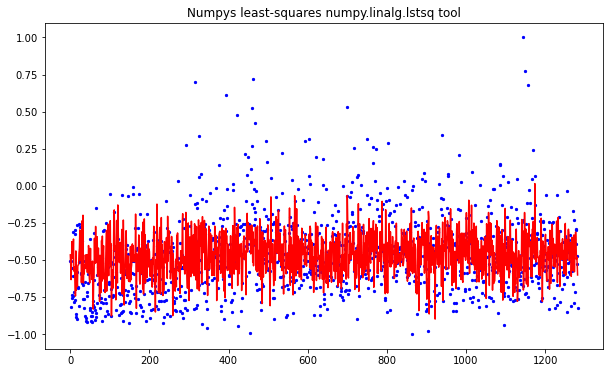

In [109]:
plt.figure(figsize=(10,6))
x_ax = range(X.shape[0])
plt.scatter(x_ax,y,s=5, color="blue", label="original")
plt.plot(x_ax,resposta_linalg, color = 'red')
plt.title('Numpys least-squares numpy.linalg.lstsq tool')
plt.show()

In [ ]:
## testando linregress 
